# Raghav Gupta

### Regression Analysis using Gapminder

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [116]:
data = pd.read_excel("gapminder.xlsx")
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [117]:
# Create the Data Frames and Variables for Analysis

gap = data[['year', 'lifeExp', 'continent']].sort_values(by=['year'])
year = gap['year']
lifexp = gap['lifeExp']

## Scatter Plot of Life Expectancy Over Time

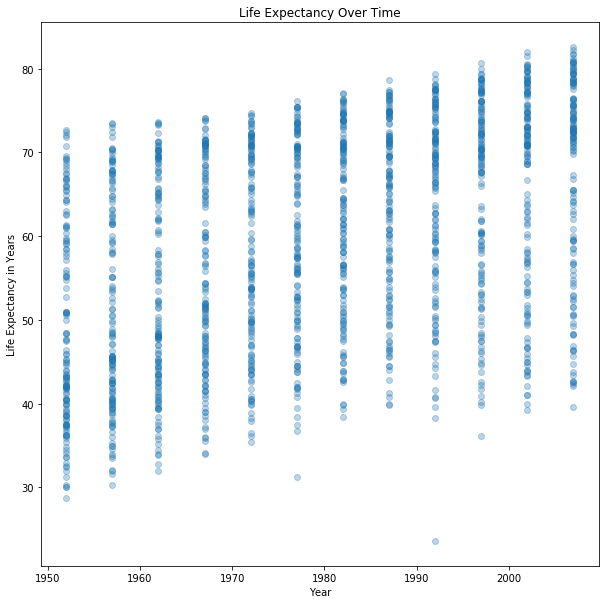

In [118]:
# Plot the figure

plt.figure(figsize = (10,10))
plt.plot(year, lifexp,'o', alpha=0.3)
plt.title("Life Expectancy Over Time")

# Axis Labels

plt.xlabel("Year")
plt.ylabel("Life Expectancy in Years")

plt.show()

## Violin Plot of Life Expectancy Over Time

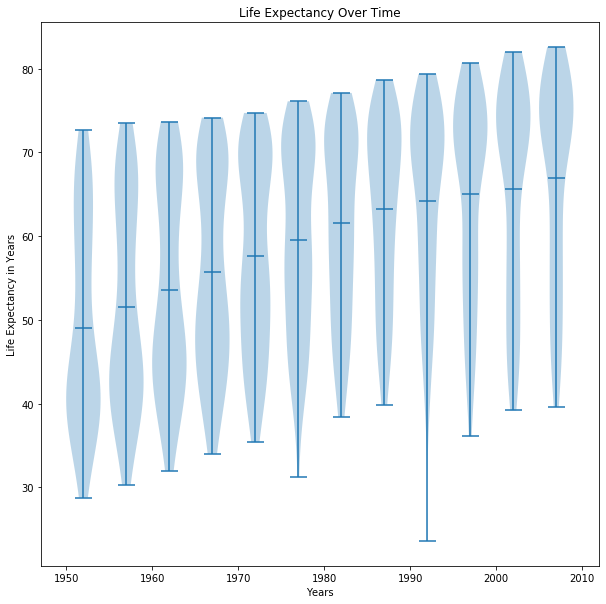

In [119]:
# Create an empty list and add to it using a for loop

lfst = []
for y in data['year'].unique(): 
    data_y = data[data['year'] == y]
    lfst.append(data_y['lifeExp'])
    
# Plot the Figure

plt.figure(figsize = (10,10))
plt.title('Life Expectancy Over Time')
plt.xlabel('Years')
plt.ylabel('Life Expectancy in Years')
    
plt.violinplot(lfst, data['year'].unique(), widths=4, showmeans=True)
plt.show()


Both the scatter plot and the violin show that life expectancy has increased over time

In [120]:
# Model specification

model = linear_model.LinearRegression()
x = np.array(data['year']).reshape(len(data['year']),1)
y = data['lifeExp']
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [121]:


print('Y = A + BX')
print('A: {}'.format(model.intercept_))
print('B: {}'.format(model.coef_[0]))
print('R^2: {}'.format(model.score(x,y)))

Y = A + BX
A: -585.6521874415445
B: 0.32590382763715164
R^2: 0.18975713852188814


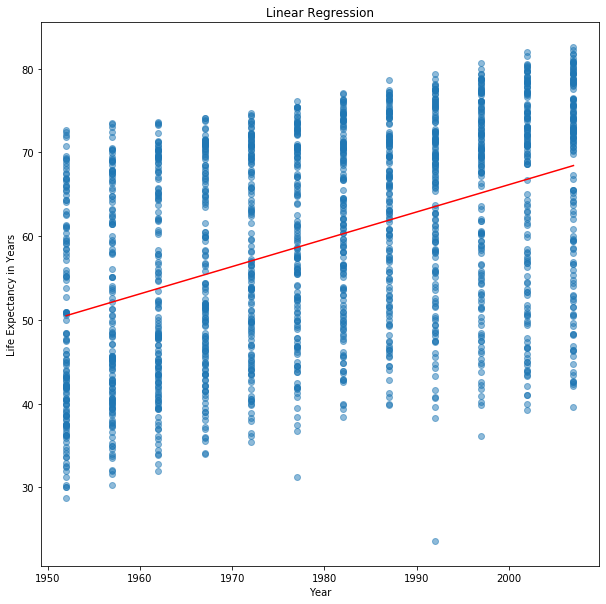

In [122]:
# Plot the figure

plt.figure (figsize = (10,10))
plt.plot(year,lifexp,'o', alpha = 0.5)
m,b = np.polyfit(x[:,0],y,1)
plt.plot(x,m*x+b,'r')
plt.title('Linear Regression')
plt.xlabel("Year")
plt.ylabel("Life Expectancy in Years")
plt.show()

In [123]:
model_linear = ols(formula="lifeExp ~ year", data=gap).fit()
print (model_linear.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     398.6
Date:                Fri, 08 Oct 2021   Prob (F-statistic):           7.55e-80
Time:                        18:04:39   Log-Likelihood:                -6597.9
No. Observations:                1704   AIC:                         1.320e+04
Df Residuals:                    1702   BIC:                         1.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -585.6522     32.314    -18.124      0.0


The linear trend in average life expectancy is that it increase by 0.32 years every year

Now, looking at residuals to check the robustness of our analysis. First we will look at residuals accross time, and then residuals accross continents.

In [124]:
# Save the intercept and slope

intercept = model_linear.params.Intercept
slope = model_linear.params.year

# Calculate residuals and add them to the data

gap['expected_lifeExp'] =  intercept + slope * gap['year']
gap['residual'] = gap['lifeExp'] - gap['expected_lifeExp']

gap.head()

,year,lifeExp,continent,expected_lifeExp,residual
0,1952,28.801,Asia,50.512084,-21.711084
528,1952,67.410,Europe,50.512084,16.897916
540,1952,37.003,Africa,50.512084,-13.509084
1656,1952,43.160,Asia,50.512084,-7.352084
552,1952,30.000,Africa,50.512084,-20.512084


## Violin Plot of Residuals Across Time

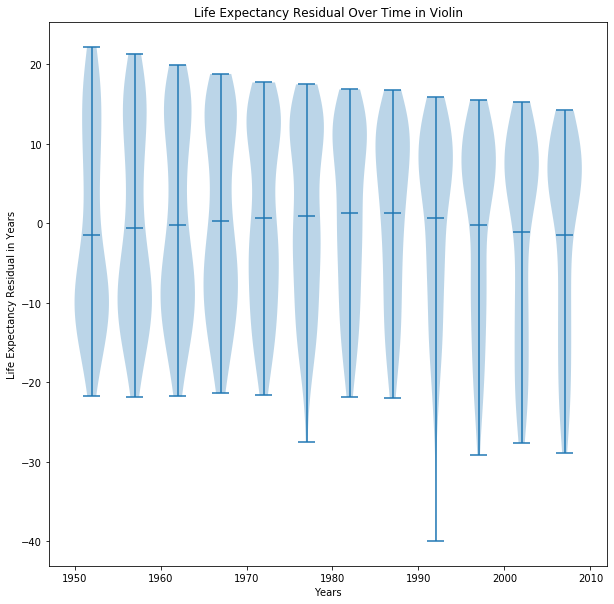

In [125]:
# Create a list of the residual of every country's life expectancy per year

list_1 = []
for y in gap['year'].unique(): 
    data_y = gap[gap['year'] == y]
    list_1.append(data_y['residual'])

# Set the figure's aesthetics

plt.figure(figsize=(10,10))
plt.title('Life Expectancy Residual Over Time in Violin')
plt.xlabel('Years')
plt.ylabel('Life Expectancy Residual in Years')

# Plot the figure

plt.violinplot(list_1, gap['year'].unique(), widths=4, showmeans=True)
plt.show()

There is a linear trend in residuals accross years, ensuring that these residuals don't contain any information that is being left out by the analysis

However, among continents, there is no single trend in residuals. This means that we can include an interaction term for continent and year.

## Boxplot of model residuals for continents

{'whiskers': [<matplotlib.lines.Line2D at 0x1a20d89390>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1ef59a90>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a207f9350>,
 'medians': [<matplotlib.lines.Line2D at 0x1a20d89150>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a1ef63c50>,
 'means': []}

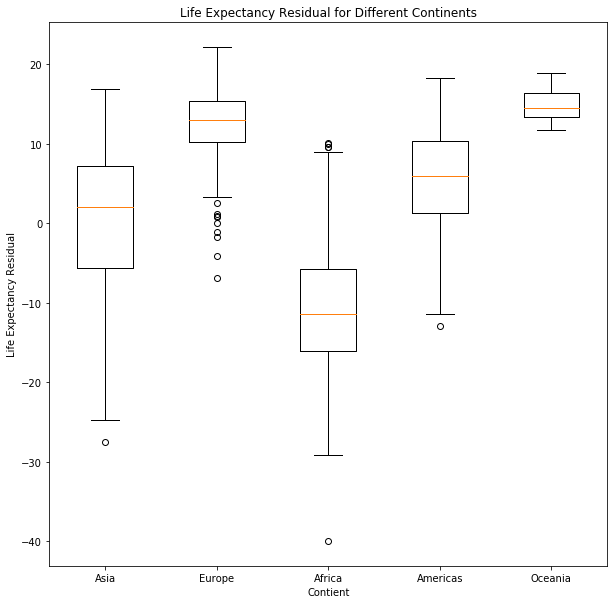

In [126]:
# Create a list of the residual for every continent

list_2 = []
for c in gap['continent'].unique():
    data_c = gap[gap['continent'] == c]
    list_2.append( data_c['residual']) 

# Set the figure's aesthetics

plt.figure (figsize = (10,10))
plt.title ('Life Expectancy Residual for Different Continents')
plt.xlabel ('Contient')
plt.ylabel ('Life Expectancy Residual')

# Plot the figure

plt.boxplot(list_2, labels = gap['continent'].unique())

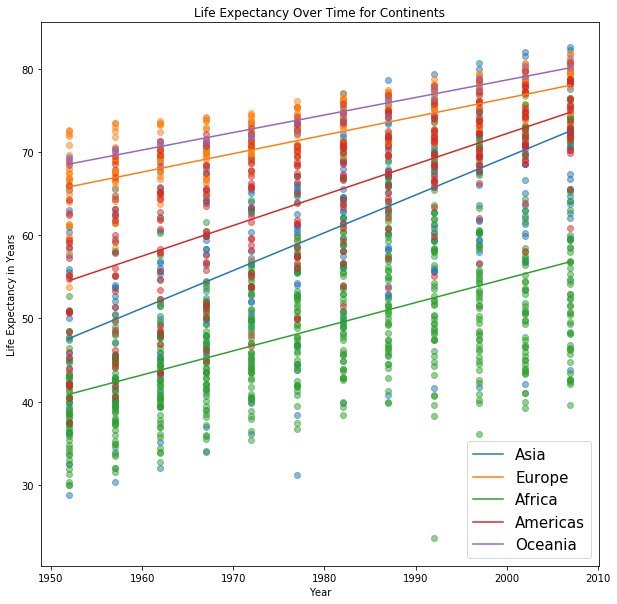

In [127]:
plt.figure(figsize=(10,10))
plt.title('Life Expectancy Over Time for Continents')
plt.xlabel('Year')
plt.ylabel('Life Expectancy in Years')


for c in gap['continent'].unique():
    scatter_data = gap[gap['continent'] == c]
    x = scatter_data['year']
    y = scatter_data['lifeExp']
    m, b = np.polyfit(x,y,1)
    plt.scatter(x,y,alpha=0.5)
    plt.plot(x, m*x+b, label=c)

plt.legend(loc='lower right', prop = {'size' : 15})
plt.show()

In [128]:
model_linear_2 = ols(formula="lifeExp ~ year*continent", data=gap).fit()
print (model_linear_2.summary())

                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:04:40   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [129]:
model_linear_2.params

Intercept                    -524.257846
continent[T.Americas]        -138.848447
continent[T.Asia]            -312.633049
continent[T.Europe]           156.846852
continent[T.Oceania]          182.349883
year                            0.289529
year:continent[T.Americas]      0.078122
year:continent[T.Asia]          0.163593
year:continent[T.Europe]       -0.067597
year:continent[T.Oceania]      -0.079257
dtype: float64